<a href="https://colab.research.google.com/github/duonghiepit/Multivariate-Non-Linear-Regresion-Fish/blob/main/Overview_Multivariate_Non_Linear_Regresion_Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1.Load Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/Fish.csv")
df

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB




---


**Hệ số tương quan** trong tiếng Anh là Correlation coefficient.

Hệ số tương quan là chỉ số thống kê đo lường mức độ mạnh yếu của mối quan hệ giữa hai biến số. Trong đó:

Hệ số tương quan có giá trị từ -1.0 đến 1.0. Kết quả được tính ra lớn hơn 1.0 hoặc nhỏ hơn -1 có nghĩa là có lỗi trong phép đo tương quan.

- Hệ số tương quan có giá trị âm cho thấy hai biến có mối quan hệ nghịch biến hoặc tương quan âm (nghịch biến tuyệt đối khi giá trị bằng -1)

- Hệ số tương quan có giá trị dương cho thấy mối quan hệ đồng biến hoặc tương quan dương (đồng biến tuyệt đối khi giá trị bằng 1)

- Tương quan bằng 0 cho hai biến độc lập với nhau.

In [ ]:
df.corr()
#Hệ số tương quan càng gần 1 thì tương quan giữa các biến càng lớn

<ipython-input-129-3e1fb1ce00b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<ipython-input-130-dd75347ce8cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


Text(0.5, 1.0, 'Correlation Matrix')

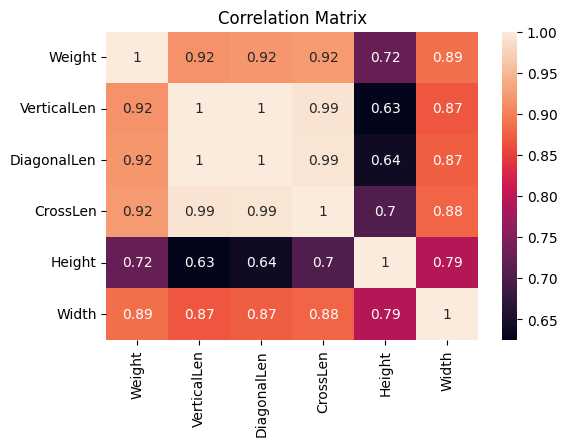

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')

**One hot encoding**

In [ ]:
encode_species = pd.get_dummies(df.Species)
encode_species.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [ ]:
new_df = pd.concat([df, encode_species], axis='columns')
new_df

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [ ]:
data = new_df.drop("Species", axis = 1).to_numpy()
data

array([[242. ,  23.2,  25.4, ...,   0. ,   0. ,   0. ],
       [290. ,  24. ,  26.3, ...,   0. ,   0. ,   0. ],
       [340. ,  23.9,  26.5, ...,   0. ,   0. ,   0. ],
       ...,
       [ 12.2,  12.1,  13. , ...,   0. ,   1. ,   0. ],
       [ 19.7,  13.2,  14.3, ...,   0. ,   1. ,   0. ],
       [ 19.9,  13.8,  15. , ...,   0. ,   1. ,   0. ]])

In [ ]:
X_data = np.c_[np.ones((len(data), 1)), data[:, 1:]]
y = data[:, :1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (127, 13)
X_test shape:  (32, 13)
y_train shape:  (127, 1)
y_test shape:  (32, 1)


# 2.Linear Regression

In [ ]:
def r2score(y_pred, y):
  rss = np.sum((y_pred-y)**2)
  tss = np.sum((y-np.mean(y))**2)
  r2 = 1-rss/tss
  return r2

In [ ]:
class LinearRegression:
  def __init__(self, X_data, y_target, learning_rate=0.001, num_epochs=10000):
    self.X_data = X_data
    self.y_target = y_target
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs
    self.num_samples = self.X_data.shape[0]

    #Initial Coeficiencts
    self.theta = np.random.randn(self.X_data.shape[1]).reshape((self.X_data.shape[1], 1))
    self.losses = []

  def predict(self, X_data):
    y_pred = X_data.dot(self.theta)
    return y_pred

  def compute_loss(self, y_pred, y_target):
    loss = (y_pred-self.y_target)**2
    loss = np.mean(loss)
    return loss

  def fit(self):
    for epoch in range(self.num_epochs):
      y_pred = self.predict(self.X_data)

      loss = self.compute_loss(y_pred, self.y_target)
      self.losses.append(loss)

      k = 2*(y_pred-self.y_target)
      gradients = self.X_data.T.dot(k)/self.num_samples

      self.theta -= self.learning_rate*gradients

      print(f'Epoch: {epoch} - Loss: {loss}')

    return {
        'loss': np.mean(self.losses),
        'weight': self.theta
    }

In [ ]:
linear_model  = LinearRegression(X_test, y_test, 0.00001, 100000)
linear_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 95000 - Loss: 26075.499078195928
Epoch: 95001 - Loss: 26075.39436288503
Epoch: 95002 - Loss: 26075.289648380545
Epoch: 95003 - Loss: 26075.18493468251
Epoch: 95004 - Loss: 26075.08022179087
Epoch: 95005 - Loss: 26074.975509705637
Epoch: 95006 - Loss: 26074.870798426804
Epoch: 95007 - Loss: 26074.76608795435
Epoch: 95008 - Loss: 26074.661378288278
Epoch: 95009 - Loss: 26074.556669428574
Epoch: 95010 - Loss: 26074.451961375235
Epoch: 95011 - Loss: 26074.347254128254
Epoch: 95012 - Loss: 26074.242547687605
Epoch: 95013 - Loss: 26074.1378420533
Epoch: 95014 - Loss: 26074.03313722532
Epoch: 95015 - Loss: 26073.928433203662
Epoch: 95016 - Loss: 26073.82372998832
Epoch: 95017 - Loss: 26073.719027579267
Epoch: 95018 - Loss: 26073.61432597652
Epoch: 95019 - Loss: 26073.50962518005
Epoch: 95020 - Loss: 26073.40492518986
Epoch: 95021 - Loss: 26073.30022600596
Epoch: 95022 - Loss: 26073.19552762827
Epoch: 95023 - Loss: 26073.090830056

{'loss': 32471.005946269222,
 'weight': array([[-94.01722337],
        [ 22.52202144],
        [ 14.92924588],
        [-27.613389  ],
        [ 28.00245509],
        [ 40.71335363],
        [  2.91182007],
        [-14.23640619],
        [-44.28140158],
        [  7.81133738],
        [-13.88736951],
        [-30.00889845],
        [ -3.75585783]])}

In [ ]:
y_pred = linear_model.predict(X_test)
r2score(y_pred, y_test)

0.8202899665491916

In [ ]:
y_pred = linear_model.predict(X_train)
r2score(y_pred, y_train)

0.6985209293250096

# 3.Polynomial Regression

## 3.1.Simple Approach

**Form**
$(a+b)^2 => a^2 + b^2 + a + b + 1$

In [ ]:
def creat_polynomial_features(X, degree=2):
  X_mem = []
  for i in range(X.shape[1]):
    X_sub = X[:, i:i+1]
    X_new = X_sub
    for d in range(2, degree+1):
      X_new = np.c_[X_new, np.power(X_sub, d)]
    X_mem.extend(X_new.T)
  return np.array(X_mem).T

In [ ]:
X_poly = creat_polynomial_features(X, degree=2)
X_poly

array([[ 23.2 , 538.24,  25.4 , ...,   0.  ,   0.  ,   0.  ],
       [ 24.  , 576.  ,  26.3 , ...,   0.  ,   0.  ,   0.  ],
       [ 23.9 , 571.21,  26.5 , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [ 12.1 , 146.41,  13.  , ...,   1.  ,   0.  ,   0.  ],
       [ 13.2 , 174.24,  14.3 , ...,   1.  ,   0.  ,   0.  ],
       [ 13.8 , 190.44,  15.  , ...,   1.  ,   0.  ,   0.  ]])

In [ ]:
X_poly.shape

(159, 24)

In [ ]:
X_data = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]
X_data

array([[  1.  ,  23.2 , 538.24, ...,   0.  ,   0.  ,   0.  ],
       [  1.  ,  24.  , 576.  , ...,   0.  ,   0.  ,   0.  ],
       [  1.  ,  23.9 , 571.21, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  1.  ,  12.1 , 146.41, ...,   1.  ,   0.  ,   0.  ],
       [  1.  ,  13.2 , 174.24, ...,   1.  ,   0.  ,   0.  ],
       [  1.  ,  13.8 , 190.44, ...,   1.  ,   0.  ,   0.  ]])

In [ ]:
X_data.shape, y.shape

((159, 25), (159, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (127, 25)
X_test shape:  (32, 25)
y_train shape:  (127, 1)
y_test shape:  (32, 1)


In [ ]:
poly_model = LinearRegression(X_train, y_train, 0.0000001, 200000)
poly_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 195000 - Loss: 3433.967471061161
Epoch: 195001 - Loss: 3433.9641089629317
Epoch: 195002 - Loss: 3433.9607469061034
Epoch: 195003 - Loss: 3433.957384890676
Epoch: 195004 - Loss: 3433.9540229166473
Epoch: 195005 - Loss: 3433.9506609840255
Epoch: 195006 - Loss: 3433.9472990927993
Epoch: 195007 - Loss: 3433.943937242983
Epoch: 195008 - Loss: 3433.9405754345516
Epoch: 195009 - Loss: 3433.9372136675292
Epoch: 195010 - Loss: 3433.9338519419
Epoch: 195011 - Loss: 3433.930490257668
Epoch: 195012 - Loss: 3433.927128614839
Epoch: 195013 - Loss: 3433.923767013401
Epoch: 195014 - Loss: 3433.9204054533616
Epoch: 195015 - Loss: 3433.9170439347167
Epoch: 195016 - Loss: 3433.913682457469
Epoch: 195017 - Loss: 3433.910321021613
Epoch: 195018 - Loss: 3433.9069596271465
Epoch: 195019 - Loss: 3433.9035982740847
Epoch: 195020 - Loss: 3433.9002369624127
Epoch: 195021 - Loss: 3433.8968756921245
Epoch: 195022 - Loss: 3433.893514463234
Epoch: 19502

{'loss': 4794.915111731029,
 'weight': array([[ 0.02227114],
        [-0.86006739],
        [-0.20400853],
        [-4.48561568],
        [ 1.0915342 ],
        [-3.81629208],
        [-0.41390404],
        [-0.9380197 ],
        [ 1.59932926],
        [-1.18955203],
        [ 5.82957936],
        [ 0.52114565],
        [-2.02944909],
        [ 1.657394  ],
        [-1.08040513],
        [ 0.93640043],
        [ 1.64652639],
        [-0.13407428],
        [ 0.14374187],
        [-0.68364785],
        [-1.40524988],
        [-0.44108595],
        [-1.79222722],
        [ 0.16139266],
        [-0.42507645]])}

In [ ]:
y_pred = poly_model.predict(X_train)
r2score(y_pred, y_train)

0.972197894870021

In [ ]:
preds = poly_model.predict(X_test)
r2score(preds, y_test)

0.9717458448879549

## 3.2.Advanced Approach

**Form**
$(a+b)^2 => a^2 + b^2 + ab + a + b + 1$

In [ ]:
class PolynomialFeaturesForDegree():
  def __init__(self, degree):
    self.degree = degree
    self.options = []

  def display_terms(self):
    '''
    If a training instance has three features, i.e. [a,b,c], and (0,0,2) is
    displayed this indicates that a^0 * b^0 * c^2 is a term in the polynomial
    expansion of the dataset.
    '''
    print('Exponent of features at each index:')
    for i in sorted(self.options):
      print(i)

  def get_terms(self, features):
    m = features.shape[1]

    # Determines the number of possible combinations with a summation of m
    # variables raised to power n.
    num = (self.degreee+1)**m
    ls = [0]*m

    # Calculate all possible combinations of the features in the dataset.
    for x in range(1, num):
      for idx in range(len(ls)-1, -1, -1):
        if ls[idx]==0:
          ls[idx]+=1
          break
        elif ls[idx]%self.degree==0:
          ls[idx]=0
          if ls[idx-1] != self.degree:
            ls[idx-1]+=1
            break
          else:
            deficit = -1
            stop = False
            while not stop and (idx+deficit)>-1:
              if ls[idx+deficit] != self.degree:
                ls[idx+deficit] += 1
                stop = True
              else:
                ls[idx+deficit] = 0
                deficit -= 1
            break
        elif idx == (len(ls)-1):
          ls[idx] += 1
          break


      # This is the Kronecker Delta Function used to eliminate terms that
      # do not form part of the polynomial expansion.
      if sum(ls) == self.degree:
        self.options.append(tuple(ls))

  def get_polynomial_features(self, features):
    # Calculate the terms in the polynomial expansion.
    self.get_terms(features)

    poly_features  = np.empty((len(features),0))
    feature_ls = []

    # Add vector of ones for degree zero.
    for i in range(features.shape[1]):
      feature_ls.append(features[:,i].reshape(-1,1))

    # Add the polynomial features to the dataset.
    for i,tup in enumerate(self.options):
      vector = np.full((len(features), 1), 1)

      # Calculate polynomial feature.
      vector = np.float_(vector)
      for feature_idx, exp in enumerate(tup):
        vector *= feature_ls[feature_idx] ** exp

      # Append polynomial feature to the dataset.
      poly_features = np.c_[poly_features,vector]

    return poly_features

In [ ]:
class PolynomialFeaturesForDegree():
    '''
    Calculates the polynomial features of a dataset for a given degree.

    Args:
        degree (int): The degree of the polynomial features to be calculated.

    Attributes:
        degree (int): The degree of the polynomial features to be calculated.
        options (list): A list containing n-tuples specifying the exponent of each
                        feature in the dataset for each term in the polynomial
                        expansion.
    '''

    def __init__(self, degree):
        self.degree = degree
        self.options = []


    def display_terms(self):
        '''
        If a training instance has three features, i.e. [a,b,c], and (0,0,2) is
        displayed this indicates that a^0 * b^0 * c^2 is a term in the polynomial
        expansion of the dataset.
        '''

        print('Exponents of features at each index:')
        for i in sorted(self.options):
            print(i)


    def get_terms(self, features):
        m = features.shape[1]

        # Determines the number of possible combinations with a summation of m
        # variables raised to power n.
        num = (self.degree+1)**m
        ls = [0] * m

        # Calculate all possible combinations of the features in the dataset.
        for x in range(1,num):
            for idx in range(len(ls)-1, -1, -1):
                if ls[idx] == 0:
                    ls[idx] += 1
                    break
                elif ls[idx] % self.degree == 0:
                    ls[idx] = 0
                    if ls[idx - 1] != self.degree:
                        ls[idx-1] += 1
                        break
                    else:
                        deficit = -1
                        stop = False
                        while not stop and (idx + deficit) > -1:
                            if ls[idx + deficit] != self.degree:
                                ls[idx + deficit] += 1
                                stop = True
                            else:
                                ls[idx + deficit] = 0
                                deficit -= 1
                        break
                elif idx == (len(ls) - 1):
                    ls[idx] += 1
                    break

            # This is the Kronecker Delta Function used to eliminate terms that
            # do not form part of the polynomial expansion.
            if sum(ls) == self.degree:
                self.options.append(tuple(ls))


    def get_polynomial_features(self, features):
        # Calculate the terms in the polynomial expansion.
        self.get_terms(features)

        poly_features  = np.empty((len(features),0))
        feature_ls = []

        # Add vector of ones for degree zero.
        for i in range(features.shape[1]):
            feature_ls.append(features[:,i].reshape(-1,1))

        # Add the polynomial features to the dataset.
        for i,tup in enumerate(self.options):
            vector = np.full((len(features), 1), 1)

            # Calculate polynomial feature.
            vector = np.float_(vector)
            for feature_idx, exp in enumerate(tup):
                vector *= feature_ls[feature_idx] ** exp

            # Append polynomial feature to the dataset.
            poly_features = np.c_[poly_features,vector]

        return poly_features



class PolynomialFeatures():
    '''
    Calculates the polynomial features for all degrees up to and including the
    specified degree.

    Args:
        degree (int): The highest degree polynomial features to be calculated.

    Attributes:
        degree (int): The highest degree polynomial features to be calculated.
        transformers (list): A list containing one transformer for each degree
                            for which polynomial features are to be calculated.
    '''

    def __init__(self, degree):
        self.degree = degree

    def fit(self):
        self.transformers = []
        # Add one transformer for each degree.
        for i in range(1, self.degree + 1):
            self.transformers.append(PolynomialFeaturesForDegree(i))

    def transform(self,dataset):
        try:
            temp = np.ones((len(dataset),1))
            # Calculate and add polynomial features for each degree to the dataset.
            for t in self.transformers:
                features_for_deg = t.get_polynomial_features(dataset)
                temp = np.c_[temp, features_for_deg]
            return temp
        except AttributeError:
            print('Transformer not fitted, call \'fit\' with appropriate arguments before using transformer.')

In [ ]:
poly_feature = PolynomialFeatures(2)
poly_feature.fit()
X_data = poly_feature.transform(X)

In [ ]:
# X_data has bias
print(X_data)

[[  1.     0.     0.   ... 696.   589.28 538.24]
 [  1.     0.     0.   ... 748.8  631.2  576.  ]
 [  1.     0.     0.   ... 743.29 633.35 571.21]
 ...
 [  1.     0.     1.   ... 166.98 157.3  146.41]
 [  1.     0.     1.   ... 200.64 188.76 174.24]
 [  1.     0.     1.   ... 223.56 207.   190.44]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_test.shape)

X_train shape:  (127, 91)
X_test shape:  (32, 91)
y_train shape:  (127, 1)
y_train shape:  (32, 1)


In [ ]:
poly_model = LinearRegression(X_train, y_train, learning_rate=0.0000001, num_epochs=100000)
poly_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 95000 - Loss: 2638.7802839321225
Epoch: 95001 - Loss: 2638.771310408419
Epoch: 95002 - Loss: 2638.762337088629
Epoch: 95003 - Loss: 2638.753363972729
Epoch: 95004 - Loss: 2638.744391060741
Epoch: 95005 - Loss: 2638.7354183526304
Epoch: 95006 - Loss: 2638.726445848407
Epoch: 95007 - Loss: 2638.7174735480676
Epoch: 95008 - Loss: 2638.708501451592
Epoch: 95009 - Loss: 2638.6995295589895
Epoch: 95010 - Loss: 2638.6905578702545
Epoch: 95011 - Loss: 2638.681586385367
Epoch: 95012 - Loss: 2638.6726151043354
Epoch: 95013 - Loss: 2638.663644027142
Epoch: 95014 - Loss: 2638.6546731537906
Epoch: 95015 - Loss: 2638.64570248427
Epoch: 95016 - Loss: 2638.6367320185873
Epoch: 95017 - Loss: 2638.6277617567184
Epoch: 95018 - Loss: 2638.618791698679
Epoch: 95019 - Loss: 2638.6098218444376
Epoch: 95020 - Loss: 2638.600852194006
Epoch: 95021 - Loss: 2638.591882747369
Epoch: 95022 - Loss: 2638.582913504532
Epoch: 95023 - Loss: 2638.57394446548

{'loss': 4227.243939810716,
 'weight': array([[-4.13165122e-01],
        [-9.78044262e-02],
        [-4.16761910e-01],
        [-4.08993782e-01],
        [ 2.41530239e-01],
        [ 3.30830833e-01],
        [ 1.19990098e+00],
        [-4.83720664e-01],
        [-3.01758950e-01],
        [ 2.90678222e-01],
        [-3.01816988e+00],
        [-3.38831295e+00],
        [-3.13727864e+00],
        [ 2.25177866e-02],
        [-9.54756401e-01],
        [-6.55803868e-01],
        [-3.93276615e-01],
        [-1.05161825e+00],
        [-3.34784277e-01],
        [ 7.84435700e-01],
        [ 3.86733914e-01],
        [ 4.28836995e-01],
        [-1.17966640e+00],
        [ 2.25807086e+00],
        [-1.18971964e+00],
        [ 1.13603197e+00],
        [ 1.63924822e+00],
        [-2.24660581e-03],
        [-8.29886653e-01],
        [-3.42013709e-01],
        [-9.55854428e-01],
        [ 1.71441765e-01],
        [-8.81175014e-02],
        [ 8.53886217e-01],
        [ 5.15764986e-01],
        [ 3.17031

In [ ]:
preds = poly_model.predict(X_train)
r2score(preds, y_train)

0.978879148628095

In [ ]:
preds = poly_model.predict(X_test)
r2score(preds, y_test)

0.9809734770329671